# Notebook 3: Subgraph Counting & Graph Limits
#### Econometric Methods for Networks
#### _CORE/UCL, December 12th to 14th, 2016_
##### _Bryan S. Graham, UC - Berkeley, bgraham@econ.berkeley.edu_
<br>
<br>
This is the third in a series of iPython Jupyter notebooks designed to accompany a series of instructional lectures given at CORE/UCL from December 12th to 14th, 2016. The scripts below were written for Python 2.7.12. The Anaconda distribution of Python, available at https://www.continuum.io/downloads, comes bundled with most the scientific computing packages used in these notebooks.
<br>
<br>
For more information about the course please visit my webpage at http://bryangraham.github.io/econometrics/.
<br>
<br>
This notebook creates the figures used in the lecture on subgraph counting. The core references for this lecture are Holland and Leinhardt (1976, _Sociological Methodology_), Bicken, Chen and Levina (2011, _Annals of Statistics_) and Bhattacharya and Bickel (2015, _Annals of Statistics_)

In [1]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Import matplotlib & networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools as it

# Directory where graphics files will be saved
graphics =  '/Users/bgraham/Dropbox/Teaching/Short_Courses/CORE_Winter_School/Lectures/'

# Motif figures
The slides and lectures notes incorporate graphics of various _network motifs_ or _graphlets_ inline using LaTex (see the short expository paper by Daniel Glasscock (_Notices of the AMS_ 62 (1): 46 - 48, 2015) for a published example of this type of typeset document. The next code snippet constructs small images of all dyad, triad and tetrad isomorphisms for undirected graphs. These images can be incorporated into LaTex documents. To do this first add the \usepackage{graphicx} line to your document preamble. Next, to place, for example, a two-star image into a block of inline mathematics just type "\vcenter{\hbox{\includegraphics[scale=0.50]{twostar.eps}}}" in the block. The scale parameter controls the size of the image. The graphics file should be in the same directory as your document file. I thank Daniel Glasscock for sharing this "trick" with me.

## Dyad and triad motifs
First construct all dyad $(k = 2)$ and triad $(k = 4)$ isomorphisms.

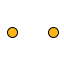

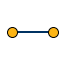

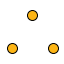

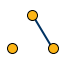

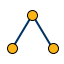

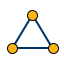

In [2]:
#---------------------------------#
#- Subgraphs with two agents     -#
#---------------------------------#

noedge=nx.Graph()                       # unconnected dyad  
noedge.add_nodes_from([1,2])

edge=nx.Graph()                         # connected dyad  
edge.add_nodes_from(noedge)
edge.add_edges_from([(1,2)])

# Generate figures for dyad configurations
# Position nodes on a line
node_pos = {1: [0,0.5], 2: [2,0.5]} 

# Empty dyad
noedge_fig = plt.figure(figsize=(1, 1))
plt.axis('off')    
ax = noedge_fig.add_subplot(1,1,1)
nx.draw_networkx(noedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'noedge.eps', bbox_inches='tight', dpi=500)  

# Connected dyad
edge_fig = plt.figure(figsize=(1, 1))
plt.axis('off')    
ax = edge_fig.add_subplot(1,1,1)
nx.draw_networkx(edge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'edge.eps', bbox_inches='tight', dpi=500)  

#---------------------------------#
#- Subgraphs with three agents   -#
#---------------------------------#

empty=nx.Graph()                        # Empty triad
empty.add_nodes_from([1,2,3])

oneedge=nx.Graph()                      # One edge triad       
oneedge.add_nodes_from(empty)
oneedge.add_edges_from([(1,2)])

twostar=nx.Graph()                      # Two star triad
twostar.add_nodes_from(empty)
twostar.add_edges_from([(1,2),(1,3)])

triangle=nx.Graph()                     # Triangle triad   
triangle.add_nodes_from(empty)
triangle.add_edges_from([(1,2),(1,3),(2,3)])

# Position nodes in the shape of a triangle
node_pos = {1: [1,1], 2: [2,0], 3: [0,0]} 

# Empty triad
empty_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = empty_fig.add_subplot(1,1,1)
nx.draw_networkx(empty, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'empty.eps', bbox_inches='tight', dpi=500)  

# One edge triad
oneedge_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = oneedge_fig.add_subplot(1,1,1)
nx.draw_networkx(oneedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'oneedge.eps', bbox_inches='tight', dpi=500)  

# Two star triad
twostar_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = twostar_fig.add_subplot(1,1,1)
nx.draw_networkx(twostar, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'twostar.eps', bbox_inches='tight', dpi=500)  

# Triangle triad
triangle_fig = plt.figure(figsize=(1, 1))
plt.axis('off') 
ax = triangle_fig.add_subplot(1,1,1)
nx.draw_networkx(triangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 100, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,2.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'triangle.eps', bbox_inches='tight', dpi=500) 

## Tetrad graphlets
Next construct the 11 tetrad isomorphisms.

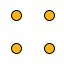

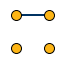

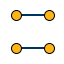

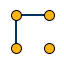

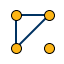

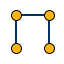

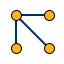

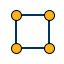

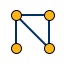

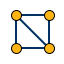

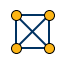

In [2]:
#---------------------------------#
#- Subgraphs with four agents    -#
#---------------------------------#

tetradempty=nx.Graph()                   # Empty
tetradempty.add_nodes_from([1,2,3,4])

tetradoneedge=nx.Graph()                 # One edge
tetradoneedge.add_nodes_from([1,2,3,4])
tetradoneedge.add_edges_from([(1,2)])

tetradtwoedge=nx.Graph()                 # Two edge
tetradtwoedge.add_nodes_from([1,2,3,4])
tetradtwoedge.add_edges_from([(1,2),(3,4)])

tetradtwostar=nx.Graph()                 # Two star
tetradtwostar.add_nodes_from([1,2,3,4])
tetradtwostar.add_edges_from([(1,2),(1,4)])

tetradonetriangle=nx.Graph()             # One triangle 
tetradonetriangle.add_nodes_from([1,2,3,4])
tetradonetriangle.add_edges_from([(1,2),(1,4),(2,4)])

fourpath=nx.Graph()                      # Four path
fourpath.add_nodes_from([1,2,3,4])
fourpath.add_edges_from([(1,4),(1,2),(2,3)])

onethreewheel=nx.Graph()                 # (1,3) wheel or 3-star
onethreewheel.add_nodes_from([1,2,3,4])
onethreewheel.add_edges_from([(1,2),(1,3),(1,4)])

fourcycle=nx.Graph()                     # Four cycle or square tetrad  
fourcycle.add_nodes_from([1,2,3,4])
fourcycle.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

tailedtriangle=nx.Graph()                # Tailed triangle
tailedtriangle.add_nodes_from([1,2,3,4])
tailedtriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4)])

chordalcycle=nx.Graph()                  # Four chordalcycle
chordalcycle.add_nodes_from([1,2,3,4])
chordalcycle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4)])

clique=nx.Graph()                        # Four clique
clique.add_nodes_from([1,2,3,4])
clique.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4),(2,4)])

#------------------------------------------------------------------#
#- Create untitled individual plots of all 11 tetrad isomorphisms -#
#------------------------------------------------------------------#

tetrad_isomorphisms = [tetradempty, tetradoneedge, tetradtwoedge, tetradtwostar, tetradonetriangle, \
                       fourpath, onethreewheel, fourcycle, tailedtriangle, chordalcycle, clique]

tetrad_isomorphism_names = ["Empty", "One Edge", "Two Edge", "Two Star", "Triangle", "Four Path", \
                            "Three Star", "Four Cycle", "Tailed Triangle", "Chordalcycle", "Clique"]

tetrad_isomorphism_files = ["tetradempty", "tetradoneedge", "tetradtwoedge", "tetradtwostar", "tetradonetriangle", \
                            "fourpath", "onethreewheel", "fourcycle", "tailedtriangle", "chordalcycle", "clique"]

# Position nodes in the shape of a square
node_pos = {1: [0,1], 2: [1,1], 3: [1,0], 4: [0,0]} 

for tetrad in range(0,len(tetrad_isomorphisms)):

    tetrad_fig = plt.figure(figsize=(1, 1))
    plt.axis('off') 
    ax = tetrad_fig.add_subplot(1,1,1)
    nx.draw_networkx(tetrad_isomorphisms[tetrad], pos = node_pos, with_labels=False, node_color='#FDB515', \
                     node_size = 100, \
                     edge_color='#003262', width=2)
    
    ax.axes.set_xlim([-0.25,1.25])
    ax.axes.set_ylim([-0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
   
    # Save result
    plt.tight_layout()
    plt.savefig(graphics+tetrad_isomorphism_files[tetrad]+'.eps', bbox_inches='tight', dpi=500)

# Graphlet Stitchings

We encountered the notation of a "graphlet stitching" when discussing the asymptotic distribution of induced subgraph frequencies in lecture. This idea is implicit in the work of Bickel and Bhattacharaya (2015, _Annals of Statistics_) and features more explicitly and prominently in some ongoing work of my own. The next two snippets of code construct stitchings of a pair of two star triads with one and two nodes in common. This code could be adapted to construct stitchings of more complicated graphlets, but it is possible that the method used below is not airtight. Specifically it could return an invalid stitching, or fail to return a valid one, in more complicated cases. So please use with caution!

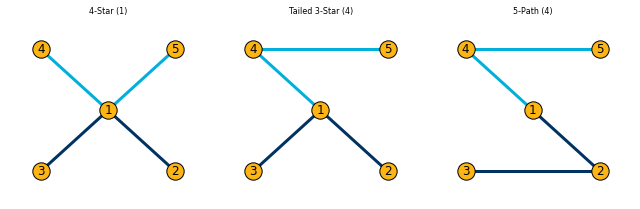

In [5]:
#-------------------------------------#
#- Construct set of possible T and U -#
#- unions with exactly q nodes in    -#
#- common.                           -#
#-------------------------------------#

#----------------------------------------------------#
#- CASE 1: T,U equals S = two star triad with q = 1 -#
#----------------------------------------------------#

# Node lists for T and U with q nodes in common
T_nodes = [1,2,3]
U_nodes = [1,4,5]

# List of isomorphisms of S on node sets for T and U
T_iso  = [[(1,2),(1,3)],[(1,2),(2,3)],\
          [(1,3),(2,3)]]
U_iso  = [[(1,4),(1,5)],[(1,4),(4,5)],\
          [(1,5),(4,5)]]

# Initialize set of allowable unions of T and U
W_q_set    = []

# Form initial list of possible W_q wirings
# Loop over all pairs of T and U wirings and join
# edge lists to create a W_q Graph if valid to do so
# NOTE: with q = 1, all possible joinings are valid; no need to check additional conditions in definition
for T in T_iso:
    for U in U_iso:
        W_q = nx.Graph()
        W_q.add_nodes_from([1,2,3,4])
        W_q.add_edges_from(list(set(T).difference(set(U))), color='#003262', style='solid')    # In T, but not U
        W_q.add_edges_from(list(set(U).difference(set(T))), color='#00B0DA', style='solid')    # In U, but not T
        W_q.add_edges_from(list(set(T).intersection(set(U))), color='#EE1F60', style='dashed') # In both T & U
        W_q_set.append(W_q)

# Remove isomorphisms from W_q list
# Loop over all distinct pairs of W_q edge lists
for (G,H) in it.combinations(W_q_set, 2):
    
    # If isomorphism found then remove second graph/edge list from W_q_set
    if nx.is_isomorphic(G,H):
        if H in W_q_set:
            W_q_set.remove(H)
        
#--------------------------------#
#- Draw W_q set                 -#
#--------------------------------#

W_q1_names = ["4-Star (1)", "Tailed 3-Star (4)", "5-Path (4)"]

W_q1_twostar_fig = plt.figure(figsize=(9, 3))

# Unions of asymmetic dyad graphlets defined on three nodes (i.e., one node in common)
# Position Nodes
node_pos = {4: [0,2], 5: [2,2], 2: [2,0], 3: [0,0], 1: [1,1]} 

for w in range(0,len(W_q_set)):
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(1,3,w+1)
  
    # Get colors and styles for edges
    edges, colors = zip(*nx.get_edge_attributes(W_q_set[w],'color').items())  
    edges, styles = zip(*nx.get_edge_attributes(W_q_set[w],'style').items())  

    # Draw current wiring
    nx.draw_networkx(W_q_set[w], pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 300, \
                     edgelist=edges, edge_color=colors, style=styles, width=3, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-0.5,2.5])
    ax.axes.set_ylim([-0.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(W_q1_names[w], fontsize=8)
    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q1_twostar.png', bbox_inches='tight', dpi=500)  

Next find the form of $ \mathcal{W}_{2,S} $ for $ S $ equal to a two star motif.

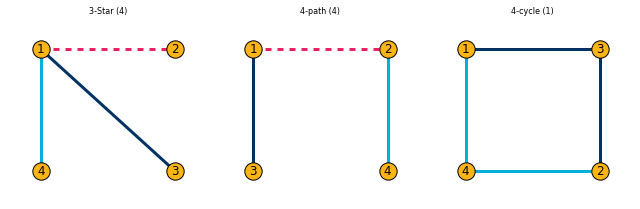

In [4]:
#----------------------------------------------------#
#- CASE 2: T,U equals S = two star triad with q = 2 -#
#----------------------------------------------------#

# Node lists for T and U with q nodes in common
T_nodes = [1,2,3]
U_nodes = [1,2,4]

# List of isomorphisms of S on node sets for T and U
T_iso  = [[(1,2),(1,3)],[(1,2),(2,3)],\
          [(1,3),(2,3)]]
U_iso  = [[(1,2),(1,4)],[(1,2),(2,4)],\
          [(1,4),(2,4)]]

# Initialize set of allowable unions of T and U
W_q_set    = []

# Form initial list of possible W_q wirings
# Loop over all pairs of T and U wirings and join
# edge lists to create a W_q Graph if valid to do so
for T in T_iso:
    for U in U_iso:
        # Check to make sure that if
        # nodes i & j are in both T and U, then
        # if edge (i,j) is in T it is also in U
        # AND if edge (i,j) is not in T it is also not in U
        
        valid_W_q = False
        
        for dyad in it.combinations(T_nodes, 2):
            if dyad in T:
                if all(node in U_nodes for node in dyad) and (dyad in U):
                    valid_W_q = True
            else:
                if all(node in U_nodes for node in dyad) and (dyad not in U):
                    valid_W_q = True
                    
        if valid_W_q:
            W_q = nx.Graph()
            W_q.add_nodes_from([1,2,3,4])
            W_q.add_edges_from(list(set(T).difference(set(U))), color='#003262', style='solid')    # In T, but not U
            W_q.add_edges_from(list(set(U).difference(set(T))), color='#00B0DA', style='solid')    # In U, but not T
            W_q.add_edges_from(list(set(T).intersection(set(U))), color='#EE1F60', style='dashed') # In both T & U
            W_q_set.append(W_q)

# Remove isomorphisms from W_q list
# Loop over all distinct pairs of W_q edge lists
for (G,H) in it.combinations(W_q_set, 2):
    
    # If isomorphism found then remove second graph/edge list from W_q_set
    if nx.is_isomorphic(G,H):
        if H in W_q_set:
            W_q_set.remove(H)
        
#--------------------------------#
#- Draw W_q set                 -#
#--------------------------------#

W_q2_names = ["3-Star (4)", "4-path (4)", "4-cycle (1)"]

W_q2_twostar_fig = plt.figure(figsize=(9, 3))

# Unions of asymmetic dyad graphlets defined on three nodes (i.e., one node in common)
# Position Nodes
node_pos = [{1: [0,2], 2: [2,2], 3: [2,0], 4: [0,0]}, \
            {1: [0,2], 2: [2,2], 3: [0,0], 4: [2,0]}, \
            {1: [0,2], 2: [2,0], 3: [2,2], 4: [0,0]}]

for w in range(0,len(W_q_set)):
    ax = 'ax'+str(w)
    ax = W_q2_twostar_fig.add_subplot(1,3,w+1)
  
    # Get colors and styles for edges
    edges, colors = zip(*nx.get_edge_attributes(W_q_set[w],'color').items())  
    edges, styles = zip(*nx.get_edge_attributes(W_q_set[w],'style').items())  
 
    # Draw current wiring
    nx.draw_networkx(W_q_set[w], pos = node_pos[w], with_labels=True, node_color='#FDB515', node_size = 300, \
                     edgelist=edges, edge_color=colors, style=styles, width=3, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-0.5,2.5])
    ax.axes.set_ylim([-0.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(W_q2_names[w], fontsize=8)
    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q2_twostar.png', bbox_inches='tight', dpi=500)  


# Graph Limits
The final snippet of code constructs a sequence of pixel plots for adjacency matrices simulated according to a $\beta$-model with increasing numbers of agents. The final panel in the picture plots the limiting graphon.

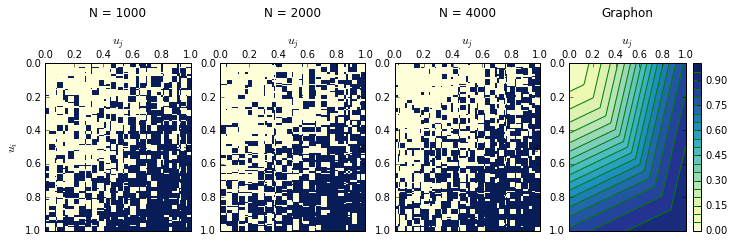

In [11]:
# Set random number seed
randst = np.random.RandomState(19)

# Network sizes
N_list = [1000, 2000, 4000]

# Calibrate model to ensure link probabilities lie between zero and one
alpha0 = np.log(0.05/0.95)
alpha1 = 0.5*(np.log(0.95/0.05) - alpha0)

graph_limit_fig = plt.figure(figsize=(12,3))

# Simulated Beta model for all network sizes in N_list
for idx, N in enumerate(N_list):
    
    # Generate random graph for current value of N
    n = N*(N - 1) // 2

    # Get multi-indices for lower triangle of N x N matrix
    ij_LowTri = np.tril_indices(N, -1)

    # Draw agent-level heterogeneity/location parameters
    U = randst.uniform(0, 1, (N,1))

    # Beta-model graphon
    p  = 1/(1+np.exp(-alpha0 - alpha1*(U + U.T)))

    # Take random draw of an adjacency matrix for given graphon
    D            = np.zeros((N,N), dtype='float64')   # N x N adjacency matrix
    D[ij_LowTri] = np.ravel(randst.uniform(0, 1, (n,)) <= p[ij_LowTri])
    D            = D + D.T

    # Create n = N choose 2 vectors with the dyad types as values
    u = np.zeros((N,N))
    v = np.zeros((N,N))

    for (i,j) in it.combinations(xrange(0,N), 2):
        u[i,j] = U[i]
        v[i,j] = U[j]
    
    u = u + u.T
    v = v + v.T

    #--------------------------------------------#
    #- Create figure object with three subplots -#
    #--------------------------------------------#

    # Plot pixel picture of current adjacency matrix
    ax = graph_limit_fig.add_subplot(1,4,idx+1)

    # Scatter of adjacency matrix; edgecolors of pixels same as faces
    plt.scatter(v[ij_LowTri],u[ij_LowTri],c=D[ij_LowTri], marker='s', cmap="YlGnBu", \
                edgecolors='face')

    # Set axis limits 
    plt.ylim([0,1])
    plt.xlim([0,1])

    # Label and configure axes to put pixel plot in "matrix form"
    ax.xaxis.tick_top() # Put x-axis on top of figure
    ax.set_xlabel(r'$u_{j}$', fontsize=12)
    ax.xaxis.set_label_position('top') 

    ax.invert_yaxis()  # Invert y-axis 
    ax.set_ylabel(r'$u_{i}$', fontsize=12)

    # Add title
    plt.title(r"N = " + str(N), y=1.25, fontsize=12)
    
#------------------------------------------------------------#    
#- Plot limiting graphon function as final panel in figures -#
#------------------------------------------------------------#    

# Create mesh grid of x, y, z values
U_grid  = np.linspace(0, 1, 100)
u, v    = np.meshgrid(U_grid, U_grid)
h       = 1/(1+np.exp(-alpha0 - alpha1*(u + v) - alpha2*np.abs(u - v))) #Homophily graphon

# Create figure object
ax = graph_limit_fig.add_subplot(144)

# Create contour "heat map" with 20 levels
cs1 = ax.contourf(u, v, h, levels=np.linspace(0, 1, 21), \
           origin='upper', extent=(0,1,0,1), cmap="YlGnBu")

# Add contour lines to plot
cs2 = plt.contour(cs1, \
                  colors='green', linewidths = 1)
# Add color bar
cbar = graph_limit_fig.colorbar(cs1, format="%.2f").add_lines(cs2)

# Label and configure axes to put graphon plot in "matrix form"
# (i.e., place origin in upper-left-hand corner)
ax.xaxis.tick_top() # Put x-axis on top of figure
ax.set_xlabel(r'$u_{j}$', fontsize=12)
ax.xaxis.set_label_position('top') 

ax.invert_yaxis()  # Invert y-axis 
ax.set_ylabel(r'$u_{i}$', fontsize=12)

# Add title
plt.title("Graphon", y=1.25, fontsize=12)

# Save the figure
plt.savefig(graphics+'graph_limit_fig.png', bbox_inches='tight', dpi=500)    

In [6]:
# This imports an attractive notebook style from Github
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())